In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# sns.set_theme(style="darkgrid")
# sns.set(rc={'figure.figsize':(11.7,8.27)})
# get the color palette
palette = sns.color_palette()

In [3]:
sns.set_palette(palette)

In [4]:
# print Working Directory
print(os.getcwd())

/home/direct-lab/Documents/christopher/Multi_Agents_Area_Exploration/analysing_data/chris_plots


In [5]:
# check the data for NaN values or other errors
df_all = pd.read_csv(f"../../data/all_data.csv")
# # data_save/all_data_map-len30.csv
# df_all = pd.read_csv(f"{root_directory}/data_save/all_data_map-len30.csv")


In [6]:
pd.options.display.max_columns = 500 # this will set limit of columns to 500

In [7]:
# check cwd if it plots
if 'analysing_data/plots' in os.getcwd():
    print("cwd is correct")

else:

    # moove to the plots folder
    #
    os.chdir("../../analysing_data/plots")
    print(os.getcwd())

cwd = os.getcwd()

/home/direct-lab/Documents/christopher/Multi_Agents_Area_Exploration/analysing_data/plots


In [8]:
df_all.shape

(25342111, 40)

In [9]:
# drop all columns with NaN values
df_all = df_all.dropna(axis=1)
df_all.shape

(25342111, 28)

In [10]:
df_all['method'] = df_all['method'].astype('category')
df_all['method'] = df_all['method'].apply(lambda x: x.replace('_', ' ').title())

# remove all _ from the column names
df_all.columns = df_all.columns.str.replace('_', ' ')
# make all the columns tital like
df_all.columns = df_all.columns.str.title()



In [11]:
df_all.describe()


,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Total Distance Travelled,Seed,N Bots,Grid Thickness,Cols,Rows,Room Area,Min Room Size,Max Room Size,Wall Ratio,Experiment Id
count,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,25342111.0,25342111.0,25342111.0,25342111.0,2.534211e+07,25342111.0,2.534211e+07,2.534211e+07
mean,9.292248e+01,8.370077e-01,1.103608e-01,7.390690e+00,1.539867e+02,1.217252e+02,2.213466e-04,9.292248e+01,2.092519e+03,5.284630e+02,6.451129e+01,6.857582e+00,10.0,50.0,50.0,2500.0,1.070058e+01,20.0,1.778716e-01,1.065071e+05
std,8.945901e+01,2.093398e-01,1.551014e-01,6.287516e+00,1.017077e+02,1.076844e+02,1.471214e-03,8.945901e+01,5.233495e+02,4.323983e+02,8.622179e+00,3.183241e+00,0.0,0.0,0.0,0.0,6.548513e+00,0.0,7.523423e-02,5.760190e+04
min,0.000000e+00,6.440000e-02,0.000000e+00,1.000000e-02,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,1.610000e+02,2.000000e+00,5.000000e+01,4.000000e+00,10.0,50.0,50.0,2500.0,4.000000e+00,20.0,9.680000e-02,0.000000e+00
25%,3.200000e+01,7.568000e-01,4.000000e-02,3.040000e+00,7.900000e+01,5.500000e+01,0.000000e+00,3.200000e+01,1.892000e+03,2.172376e+02,5.700000e+01,4.000000e+00,10.0,50.0,50.0,2500.0,4.000000e+00,20.0,9.680000e-02,5.497900e+04
50%,7.000000e+01,9.316000e-01,6.000000e-02,6.050000e+00,1.250000e+02,9.600000e+01,0.000000e+00,7.000000e+01,2.329000e+03,4.234924e+02,6.500000e+01,4.000000e+00,10.0,50.0,50.0,2500.0,1.200000e+01,20.0,1.336000e-01,1.127250e+05
75%,1.280000e+02,9.924000e-01,1.300000e-01,1.011000e+01,2.070000e+02,1.550000e+02,0.000000e+00,1.280000e+02,2.481000e+03,7.211270e+02,7.200000e+01,8.000000e+00,10.0,50.0,50.0,2500.0,2.000000e+01,20.0,2.624000e-01,1.560720e+05
max,2.499000e+03,1.000000e+00,5.130000e+00,2.651000e+02,1.282000e+03,4.838000e+03,1.000000e-02,2.499000e+03,2.500000e+03,6.943362e+03,7.900000e+01,1.200000e+01,10.0,50.0,50.0,2500.0,2.000000e+01,20.0,2.772000e-01,2.024990e+05


In [12]:
# conver columns to category that have less than 10 unique values
for col in df_all.columns:
    if df_all[col].nunique() < 20:
        df_all[col] = df_all[col].astype('category')

In [13]:
df_all.columns
# '''
# 'Unnamed: 0', 'Area Percent', 'Update Time', 'Delta Time',
#        'Plan Length', 'Replan Count', 'Logging Time', 'Frame Count',
#        'Known Area', 'Success', 'Seed', 'Draw Sim', 'Log Plots', 'Use Threads',
#        'N Bots', 'Grid Thickness', 'Screen Width', 'Screen Height',
#        'Min Room Size', 'Max Room Size', 'Wall Ratio', 'Method',
#        'Start Scenario', 'Goal Scenario', 'Experiment Id', 'Loss Type',
#        'Execution Date']
#        '''

Index(['Unnamed: 0', 'Area Percent', 'Update Time', 'Delta Time',
       'Plan Length', 'Replan Count', 'Logging Time', 'Frame Count',
       'Known Area', 'Total Distance Travelled', 'Success', 'Seed', 'Draw Sim',
       'Log Plots', 'Use Threads', 'N Bots', 'Grid Thickness', 'Cols', 'Rows',
       'Room Area', 'Min Room Size', 'Max Room Size', 'Wall Ratio', 'Method',
       'Start Scenario', 'Goal Scenario', 'Experiment Id', 'Loss Type'],
      dtype='object')

In [14]:
df_all['M'] = df_all['Method'].apply(lambda x: ''.join([str(i[0])+'.' for i in x.split(' ')]))

wost_case = df_all.groupby(['M']).max()[['Frame Count', 'Replan Count','Delta Time', 'Update Time']].sort_values(by='Frame Count')
with open(f"worst_case.txt", 'w') as f:
    f.write(wost_case.to_latex())
wost_case

/tmp/ipykernel_2967151/1649491916.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  wost_case = df_all.groupby(['M']).max()[['Frame Count', 'Replan Count','Delta Time', 'Update Time']].sort_values(by='Frame Count')
/tmp/ipykernel_2967151/1649491916.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(wost_case.to_latex())


,Frame Count,Replan Count,Delta Time,Update Time
M,,,,
U.C.,555,1460,76.10,4.47
V.F.H.C.,595,921,55.33,3.57
F.C.,678,1216,69.31,4.44
D.E.G.F.,780,1101,56.78,5.13
V.F.H.R.,894,443,38.11,3.38
G.,912,1191,56.17,3.98
F.R.,1208,1005,78.53,3.82
D.E.G.U.,2499,837,55.61,4.44
D.F.C.,2499,4838,265.10,2.23


In [15]:
# # The average frame_count for each method
# df_all.groupby(['Method']).max()['Frame Count', 'Delta Time'].sort_values().apply(lambda x: ','+str(int(x))).to_frame()

In [16]:
df_all.groupby(['Experiment Id']).max()

/tmp/ipykernel_2967151/168644692.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df_all.groupby(['Experiment Id']).max()


,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Frame Count,Known Area,Total Distance Travelled,Seed,Wall Ratio
Experiment Id,,,,,,,,,,,
0,224,1.0,0.49,12.79,294,267,224,2500,1008.666089,50,0.2696
1,129,1.0,0.61,12.09,164,200,129,2500,584.031529,50,0.1308
2,116,1.0,1.02,12.99,195,240,116,2500,538.658946,50,0.0968
3,117,1.0,0.45,9.13,130,234,117,2500,553.327994,51,0.2652
4,83,1.0,0.72,9.17,118,168,83,2500,377.149278,51,0.1300
...,...,...,...,...,...,...,...,...,...,...,...
202495,21,1.0,0.86,4.96,360,137,21,2500,275.735065,78,0.1412
202496,8,1.0,1.47,7.71,582,150,8,2500,113.639610,78,0.0968
202497,72,1.0,0.39,7.87,272,296,72,2500,907.021428,79,0.2684


In [17]:
df_end = df_all.drop_duplicates(subset=['Experiment Id'], keep='last').sort_values(by=['Experiment Id'])
# create an actanom column for the methods that takse the 1st letter of the method of each method
df_end['M'] = df_end['Method'].apply(lambda x: ''.join([str(i[0])+'.' for i in x.split(' ')]))
df_end['M'] 
df_end.head()


,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Total Distance Travelled,Success,Seed,Draw Sim,Log Plots,Use Threads,N Bots,Grid Thickness,Cols,Rows,Room Area,Min Room Size,Max Room Size,Wall Ratio,Method,Start Scenario,Goal Scenario,Experiment Id,Loss Type,M
18318338,224,1.0,0.49,12.79,0,267,0.00,224,2500,1008.666089,False,50,False,True,False,4,10,50,50,2500,4.0,20.0,0.2696,Unknown Closest,start-Rand_Start,goal-Rand_Start,0,Agent,U.C.
24992983,129,1.0,0.22,12.09,57,200,0.00,129,2500,584.031529,True,50,False,True,False,4,10,50,50,2500,12.0,20.0,0.1308,Unknown Closest,start-Rand_Start,goal-Rand_Start,1,Agent,U.C.
7855247,116,1.0,0.13,12.99,33,240,0.00,116,2500,538.658946,True,50,False,True,False,4,10,50,50,2500,20.0,20.0,0.0968,Unknown Closest,start-Rand_Start,goal-Rand_Start,2,Agent,U.C.
23175780,117,1.0,0.27,9.13,0,234,0.00,117,2500,553.327994,False,51,False,True,False,4,10,50,50,2500,4.0,20.0,0.2652,Unknown Closest,start-Rand_Start,goal-Rand_Start,3,Agent,U.C.
17936765,83,1.0,0.67,9.17,0,168,0.01,83,2500,377.149278,False,51,False,True,False,4,10,50,50,2500,12.0,20.0,0.1300,Unknown Closest,start-Rand_Start,goal-Rand_Start,4,Agent,U.C.


In [18]:
df_end[df_end['M']=='U.R.']

,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Total Distance Travelled,Success,Seed,Draw Sim,Log Plots,Use Threads,N Bots,Grid Thickness,Cols,Rows,Room Area,Min Room Size,Max Room Size,Wall Ratio,Method,Start Scenario,Goal Scenario,Experiment Id,Loss Type,M
7432427,378,1.0,0.47,19.38,0,161,0.0,378,2500,1712.893578,False,50,False,True,False,4,10,50,50,2500,4.0,20.0,0.2696,Unknown Random,start-Rand_Start,goal-Rand_Start,20250,Agent,U.R.
14098536,182,1.0,0.36,14.62,57,131,0.0,182,2500,873.732106,True,50,False,True,False,4,10,50,50,2500,12.0,20.0,0.1308,Unknown Random,start-Rand_Start,goal-Rand_Start,20251,Agent,U.R.
22305073,152,1.0,0.77,14.04,0,92,0.0,152,2500,694.570635,False,50,False,True,False,4,10,50,50,2500,20.0,20.0,0.0968,Unknown Random,start-Rand_Start,goal-Rand_Start,20252,Agent,U.R.
12283743,208,1.0,0.15,10.92,123,123,0.0,208,2500,967.962554,True,51,False,True,False,4,10,50,50,2500,4.0,20.0,0.2652,Unknown Random,start-Rand_Start,goal-Rand_Start,20253,Agent,U.R.
7041046,149,1.0,0.53,10.52,0,97,0.0,149,2500,682.156421,False,51,False,True,False,4,10,50,50,2500,12.0,20.0,0.1300,Unknown Random,start-Rand_Start,goal-Rand_Start,20254,Agent,U.R.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107833,53,1.0,1.41,14.57,84,143,0.0,53,2500,751.293506,True,78,False,True,False,12,10,50,50,2500,12.0,20.0,0.1412,Unknown Random,start-Distributed_Start,goal-Distributed_Start,40495,Disrepair,U.R.
17479612,40,1.0,2.24,17.48,88,145,0.0,40,2500,551.428499,True,78,False,True,False,12,10,50,50,2500,20.0,20.0,0.0968,Unknown Random,start-Distributed_Start,goal-Distributed_Start,40496,Disrepair,U.R.
5240774,137,1.0,0.45,22.17,405,236,0.0,137,2500,1856.138310,True,79,False,True,False,12,10,50,50,2500,4.0,20.0,0.2684,Unknown Random,start-Distributed_Start,goal-Distributed_Start,40497,Disrepair,U.R.
8643393,40,1.0,1.06,13.18,180,137,0.0,40,2500,544.215295,True,79,False,True,False,12,10,50,50,2500,12.0,20.0,0.1136,Unknown Random,start-Distributed_Start,goal-Distributed_Start,40498,Disrepair,U.R.


In [19]:

print('Success Count: ', df_end['Success'].value_counts()[True])
print('Fail Count: ', df_end['Success'].value_counts()[False])


print("the Success rate is: ", df_end['Success'].value_counts()[True]/df_end['Success'].value_counts().sum())
# drop any row Success == False
print(df_end[df_end['Success'] == False]['Loss Type'].value_counts())

# print(df_end[df_end['Success'] == False]['Method'].value_counts())


Success Count:  140566
Fail Count:  61934
the Success rate is:  0.694153086419753
Unrecoverable    41519
Agent            10274
Disrepair        10141
Name: Loss Type, dtype: int64


In [20]:
# df_end['Success Ratio'] 
method_group = df_end.groupby(['M', 'Loss Type','Success',]).count()['Experiment Id'].unstack()
method_group['Success Ratio'] = method_group[True]/(method_group[True]+method_group[False])

method_group.reset_index(inplace=True)
method_group.drop(columns=[True, False], inplace=True)
# drop Success
# method_group.drop(columns=['Success'], inplace=True)
# stack up
method_group = method_group.set_index(['M',  'Loss Type']).stack().reset_index()
method_group.drop(columns=['Success'], inplace=True)
# rename the column 0 to Success Ratio
method_group.rename(columns={0:'Success Ratio'}, inplace=True)
method_group.set_index(['M',  'Loss Type'], inplace=True)

with open(f"loss_type.tex", 'w') as f:
    # f.write(df_end.groupby(['Loss Type', 'Method','Success']).count()['Experiment Id'].to_latex())
    # rotate the table 90 degrees so the index is now the columns
    f.write(method_group.to_latex())

method_group


/tmp/ipykernel_2967151/2346326559.py:19: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(method_group.to_latex())


Success Ratio
M        Loss Type                   
D.E.G.F. Agent               0.849926
         Disrepair           0.841630
         Unrecoverable       0.360296
D.E.G.U. Agent               0.842963
         Disrepair           0.843111
         Unrecoverable       0.424444
D.F.C.   Agent               0.852741
         Disrepair           0.858667
         Unrecoverable       0.462815
F.C.     Agent               0.829630
         Disrepair           0.835852
         Unrecoverable       0.384593
F.R.     Agent               0.850519
         Disrepair           0.850667
         Unrecoverable       0.210074
G.       Agent               0.841333
         Disrepair           0.844593
         Unrecoverable       0.317778
U.C.     Agent               0.844444
         Disrepair           0.844741
         Unrecoverable       0.468444
U.R.     Agent               0.849037
         Disrepair           0.851704
         Unrecoverable       0.282963
V.F.H.C. Agent               0.865778
         Disrepair           0.867852
         Unrecoverable       0.514074
V.F.H.R. Agent               0.851556
         Disrepair           0.858815
         Unrecoverable       0.423556

In [21]:
df_end_success = df_end[df_end['Success'] == True]

with open(f"methods.tex", 'w') as f:
    # f.write(df_end_success[['Method', "M"]].drop_duplicates().reset_index(drop=True).to_latex())
    # sort alphabetically
    f.write(df_end_success[['Method', "M"]].drop_duplicates().sort_values(by='Method').reset_index(drop=True).to_latex())

/tmp/ipykernel_2967151/1376767921.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(df_end_success[['Method', "M"]].drop_duplicates().sort_values(by='Method').reset_index(drop=True).to_latex())


In [22]:
df_end.columns

Index(['Unnamed: 0', 'Area Percent', 'Update Time', 'Delta Time',
       'Plan Length', 'Replan Count', 'Logging Time', 'Frame Count',
       'Known Area', 'Total Distance Travelled', 'Success', 'Seed', 'Draw Sim',
       'Log Plots', 'Use Threads', 'N Bots', 'Grid Thickness', 'Cols', 'Rows',
       'Room Area', 'Min Room Size', 'Max Room Size', 'Wall Ratio', 'Method',
       'Start Scenario', 'Goal Scenario', 'Experiment Id', 'Loss Type', 'M'],
      dtype='object')

In [23]:
df_end.head()

,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Total Distance Travelled,Success,Seed,Draw Sim,Log Plots,Use Threads,N Bots,Grid Thickness,Cols,Rows,Room Area,Min Room Size,Max Room Size,Wall Ratio,Method,Start Scenario,Goal Scenario,Experiment Id,Loss Type,M
18318338,224,1.0,0.49,12.79,0,267,0.00,224,2500,1008.666089,False,50,False,True,False,4,10,50,50,2500,4.0,20.0,0.2696,Unknown Closest,start-Rand_Start,goal-Rand_Start,0,Agent,U.C.
24992983,129,1.0,0.22,12.09,57,200,0.00,129,2500,584.031529,True,50,False,True,False,4,10,50,50,2500,12.0,20.0,0.1308,Unknown Closest,start-Rand_Start,goal-Rand_Start,1,Agent,U.C.
7855247,116,1.0,0.13,12.99,33,240,0.00,116,2500,538.658946,True,50,False,True,False,4,10,50,50,2500,20.0,20.0,0.0968,Unknown Closest,start-Rand_Start,goal-Rand_Start,2,Agent,U.C.
23175780,117,1.0,0.27,9.13,0,234,0.00,117,2500,553.327994,False,51,False,True,False,4,10,50,50,2500,4.0,20.0,0.2652,Unknown Closest,start-Rand_Start,goal-Rand_Start,3,Agent,U.C.
17936765,83,1.0,0.67,9.17,0,168,0.01,83,2500,377.149278,False,51,False,True,False,4,10,50,50,2500,12.0,20.0,0.1300,Unknown Closest,start-Rand_Start,goal-Rand_Start,4,Agent,U.C.


In [24]:
# # df_end_success['Area Percent']/df_end_success['Total Distance Travelled']
# method_group = df_end.groupby(['M']).mean()
# method_group['Quality'] = method_group['Area Percent'] / method_group['Total Distance Travelled']
# # show quality and method
# method_group = method_group.reset_index()[['M','Quality']]
# # method_group[['M','Quality']]
# method_group = method_group.sort_values(by='Quality')
# method_group.reset_index()

In [25]:
method_group.head()

Success Ratio
M        Loss Type                   
D.E.G.F. Agent               0.849926
         Disrepair           0.841630
         Unrecoverable       0.360296
D.E.G.U. Agent               0.842963
         Disrepair           0.843111

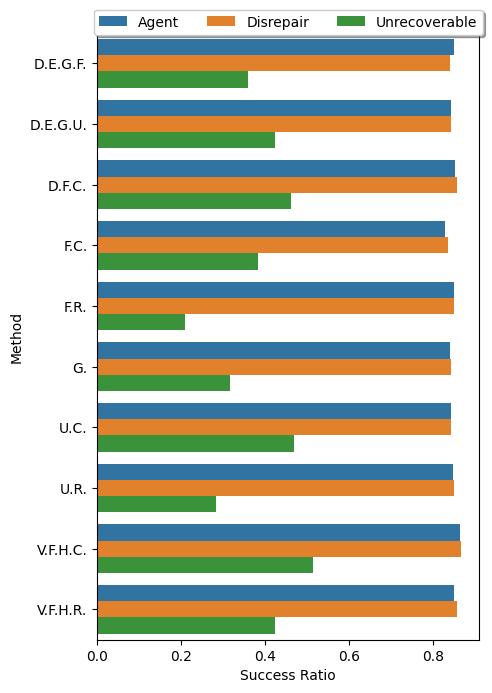

In [26]:
# method_group
sns.barplot(y="M", x="Success Ratio", hue="Loss Type", data=method_group.reset_index())
# change the fig ratio
plt.gcf().set_size_inches(5, 7.)

# rename Y axis
plt.ylabel('Method')
# move the legend to the top center
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
# 

# save the whole figure dont cut the legend
plt.tight_layout()


plt.savefig(f"Success_Ratio.png", dpi=300)

In [27]:
# g = sns.catplot(x="Experiment Id", y="count", hue="Success", kind="bar", col="Loss Type", data=df_end.groupby(['Method','Success', 'Loss Type']).count()['Experiment Id'].reset_index())

# # Set labels for axes and title
# g.set_axis_labels("Experiment Id", "Count")
# g.set_titles("{col_name} Loss Type")

In [28]:
# save only the success
df_end_success = df_end[df_end['Success'] == True]

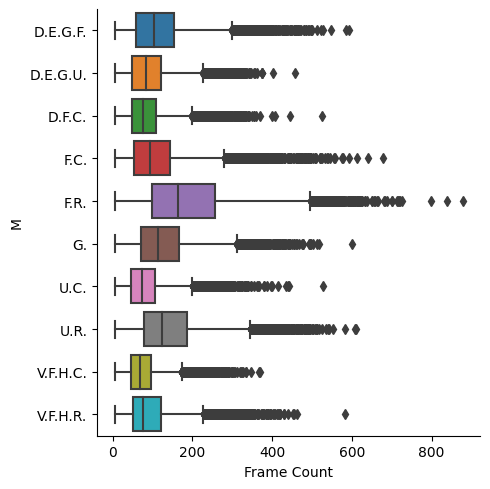

In [29]:
sns.catplot(y="M", x="Frame Count", kind="box", data=df_end_success)
plt.savefig(f"boxplot_frame_count.png")

<AxesSubplot:xlabel='Frame Count', ylabel='M'>

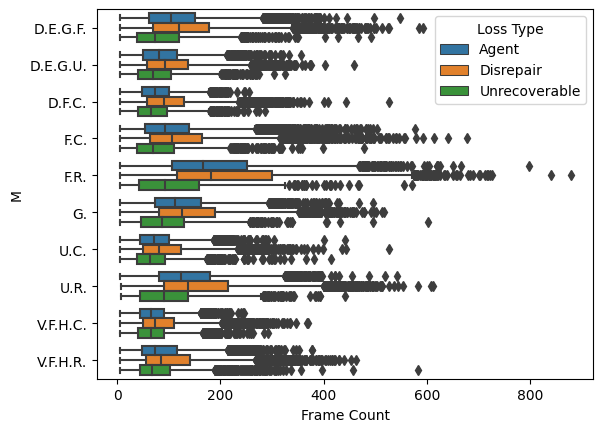

In [30]:
sns.boxplot(y="M", x="Frame Count",hue="Loss Type", data=df_end_success)


(0.0, 400.0)

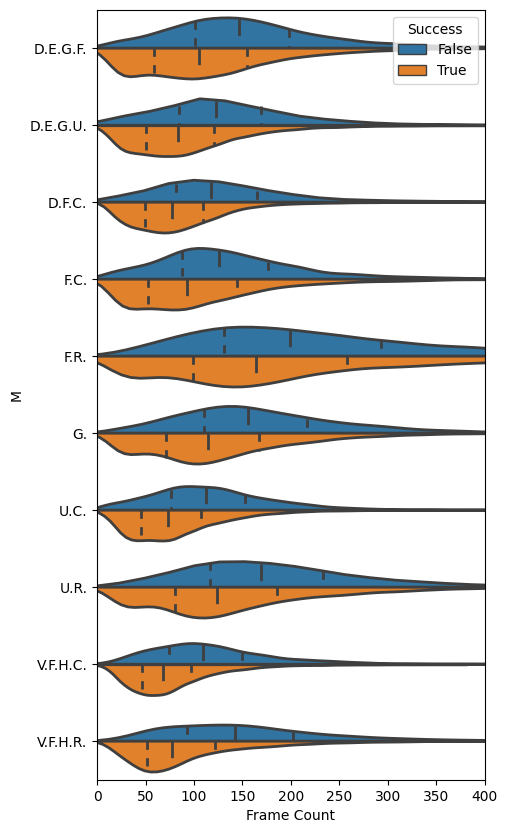

In [31]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.violinplot(y="M", x="Frame Count",hue="Success",
                data=df_end ,
                linewidth=2, split=True, inner="quartile",)
ax.set_xlim(0, 400)


<AxesSubplot:xlabel='Frame Count', ylabel='M'>

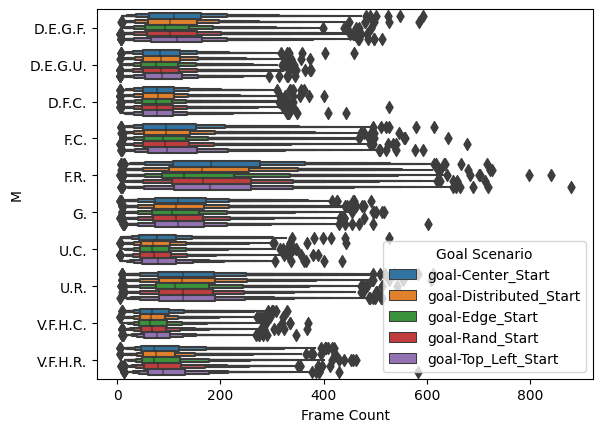

In [32]:
sns.boxenplot( y="M",x="Frame Count",hue="Goal Scenario",
                data=df_end_success ,
                )

<AxesSubplot:xlabel='Frame Count', ylabel='M'>

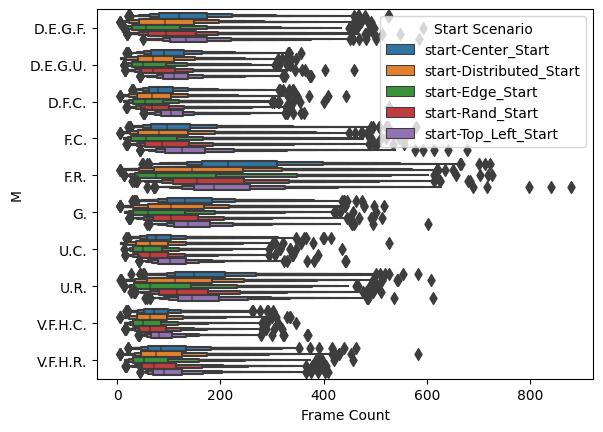

In [33]:
# "Goal Scenario" histogramq
# sns.histplot(data=df_end_success,x="Frame Count", hue="Goal Scenario", kde=True)
sns.boxenplot( y="M",x="Frame Count",hue="Start Scenario",
                data=df_end_success ,
                )


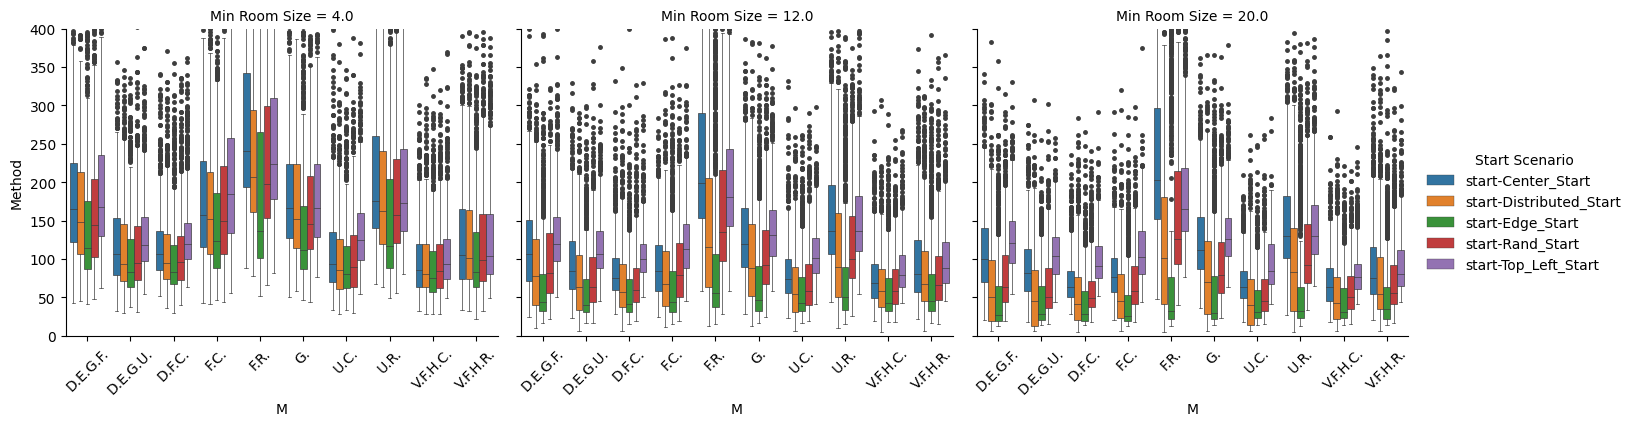

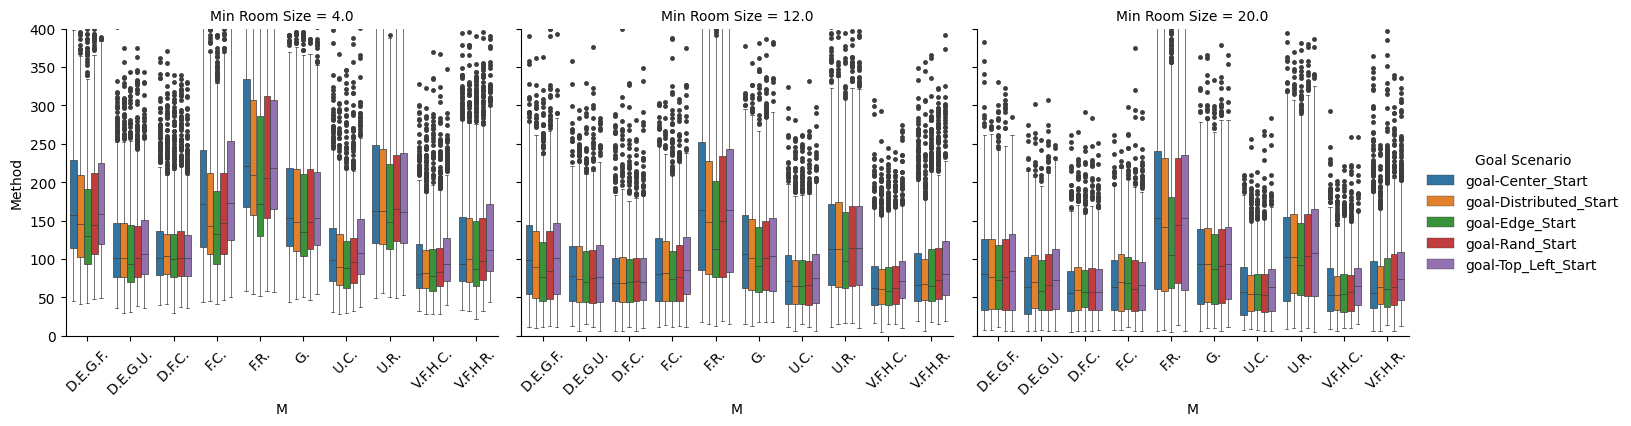

In [34]:
grd = sns.catplot(
    data=df_end_success, 
    y="Frame Count", x="M", hue="Start Scenario", 
    # col_wrap=3,
    col="Min Room Size",
    kind="box", 
    # bw=.25, cut=0, 
    flierprops={"marker": "."},

    linewidth=0.5,
    height=4, aspect=1.2, 
)
# set x range 
grd.set(ylim=(0, 400))
# set Y label
grd.set_ylabels("Method")
grd.set_xticklabels(rotation=45)

grd = sns.catplot(
    data=df_end_success, 
    y="Frame Count", x="M", hue="Goal Scenario", 
    # col_wrap=3,
    col="Min Room Size",
    kind="box", 
    # bw=.25, cut=0, 
    flierprops={"marker": "."},

    linewidth=0.5,
    height=4, aspect=1.2, 
)
# set x range 
grd.set(ylim=(0, 400))
# set Y label
grd.set_ylabels("Method")

grd.set_xticklabels(rotation=45)

# mkae the fige bigger
# grd.fig.set_size_inches(15, 6)
plt.savefig(f"boxplot_frame_count.png", dpi=300)

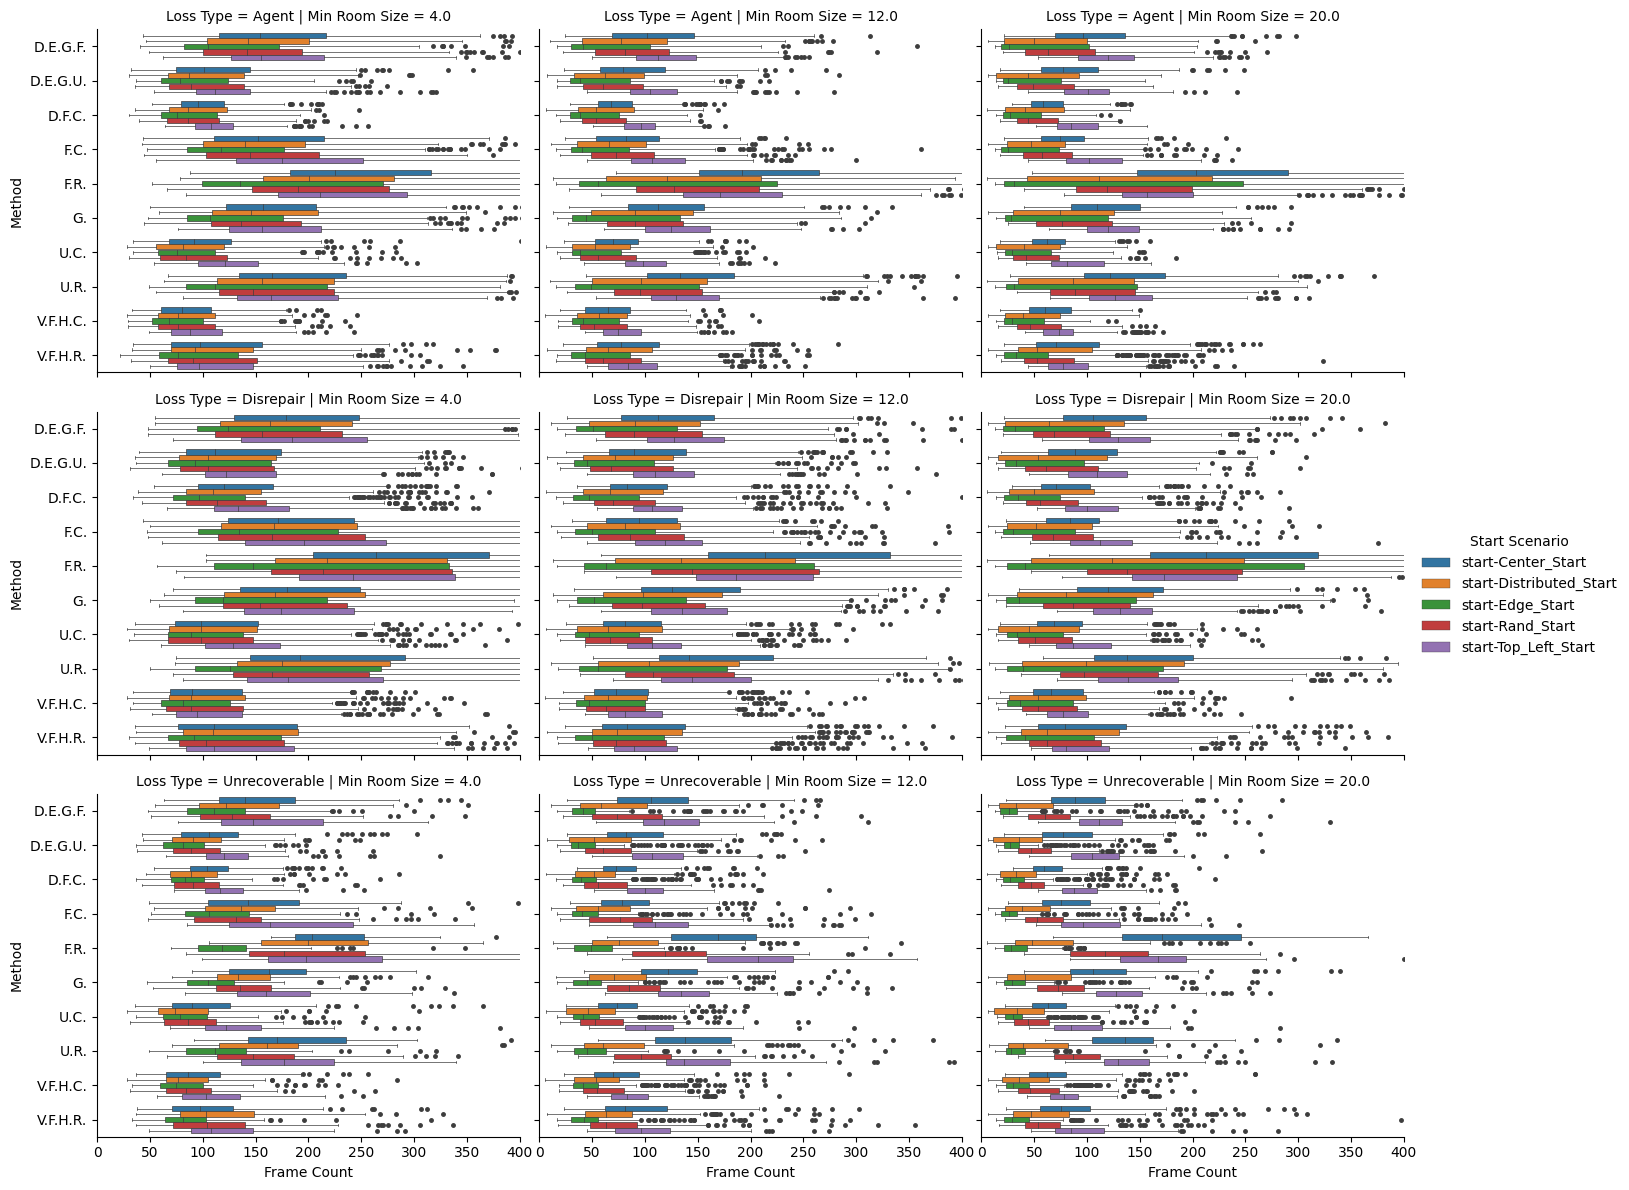

In [35]:
grd = sns.catplot(
    data=df_end_success, 
    x="Frame Count", y="M", hue="Start Scenario",
    col="Min Room Size", 
    # col_wrap=3,
    row="Loss Type",
    kind="box", 
    # bw=.25, cut=0, 
    flierprops={"marker": "."},

    linewidth=0.5,
    height=4, aspect=1.2, 
)
# set x range 
grd.set(xlim=(0, 400))
# set Y label
grd.set_ylabels("Method")



# mkae the fige bigger
# grd.fig.set_size_inches(15, 6)
plt.savefig(f"boxplot_frame_count.png", dpi=300)


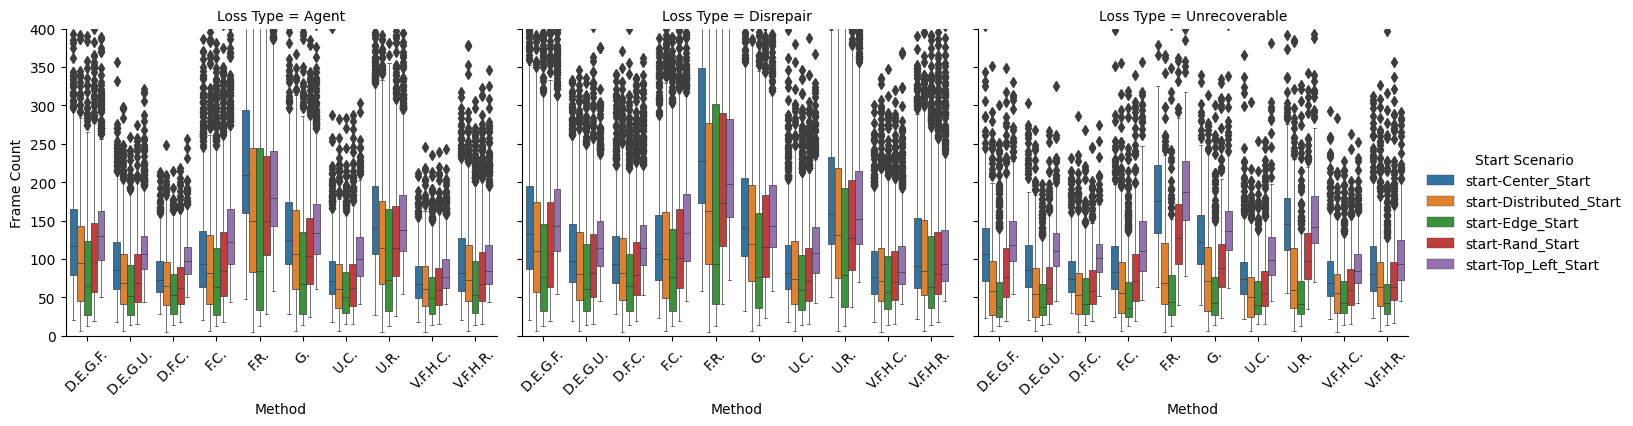

In [36]:
grd = sns.catplot(
    data=df_end_success, 
    y="Frame Count", 
    x="M", 
    hue="Start Scenario",
    col="Loss Type", 
    col_wrap=3,
    kind="box", 
    # kind="violin",
    # kind="bar",

    # bw=.25, cut=0, 
    # flierprops={"marker": "."},

    linewidth=0.5,
    height=4, aspect=1.2, 
)

# set x range 
grd.set(ylim=(0, 400))
# set Y label
grd.set_xlabels("Method")

# set the x frequency
x_range = range(0,400, 50)
# plt.yticks(x_range, x_range,)
# # rotate the x labels
# plt.xticks(rotation=90)
grd.set_xticklabels(rotation=45)

In [37]:
palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

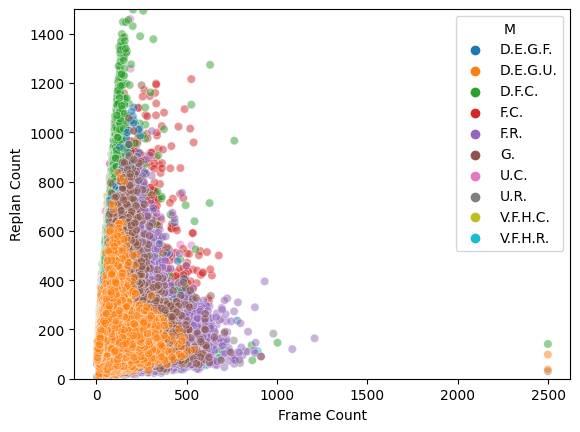

In [38]:
sns.scatterplot(x="Frame Count",y='Replan Count', hue="M", data=df_end, alpha=.5,)
# sns.kdeplot(x="Frame Count",y='Replan Count', hue="M", 
#              data=df_end,
#              fill=True,
#              levels=10,
#              alpha=.5,
#              )

# plt.xlim(0, 400)
plt.ylim(0, 1500)
plt.savefig(f"Replan_Count_vs_Frame_Count.png", dpi=300)

# get the color palette
palette = sns.color_palette()